https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

In [1]:
# !pip install kmodes
# !pip install mca

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np

from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Create toy dataset
hair_color = np.array(['blonde', 'brunette', 'red', 'black', 'brunette', 'black', 'red', 'black'])
eye_color = np.array(['amber', 'gray', 'green', 'hazel', 'amber', 'gray', 'green', 'hazel'])
skin_color = np.array(['fair', 'brown', 'brown', 'brown', 'fair', 'brown', 'fair', 'fair'])
person = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':person, 'hair_color':hair_color, 'eye_color':eye_color, 'skin_color':skin_color})
data = data.set_index('person')
print(data)

       hair_color eye_color skin_color
person                                
P1         blonde     amber       fair
P2       brunette      gray      brown
P3            red     green      brown
P4          black     hazel      brown
P5       brunette     amber       fair
P6          black      gray      brown
P7            red     green       fair
P8          black     hazel       fair


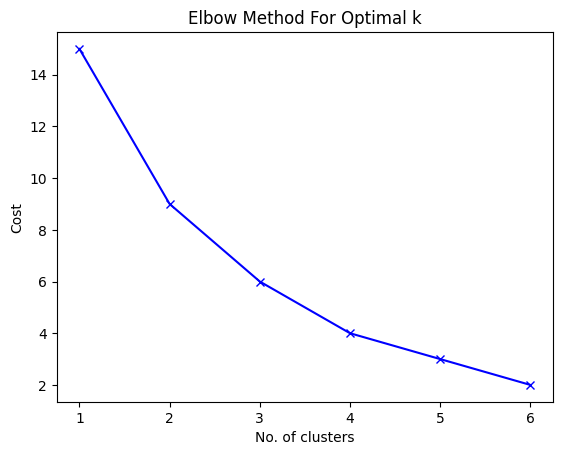

4


In [8]:
# For KModes, plot cost for a range of K values. Cost is the sum of all the dissimilarities between the clusters.

# Select the K where you observe an elbow-like bend with a lesser cost value.

# Elbow curve to find optimal K
cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


slope = np.diff(cost) / np.diff(K) 
max_slope_idx = np.argmax(slope)
max_slope = slope[max_slope_idx]
threshold_slope = max_slope * 0.1

elbow_idx = None
for i in range(max_slope_idx, len(slope)):
    if slope[i] < threshold_slope:
        elbow_idx = i
        break
        
optimal_K = K[elbow_idx] 
print(f"{optimal_K}")

In [9]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 7.0
Run 1, iteration: 2/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 8.0
Run 2, iteration: 2/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 6.0
Run 3, iteration: 2/100, moves: 1, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3, cost: 7.0
Run 4, iteration: 2/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2, cost: 6.0
Best run was number 3


array([2, 0, 1, 0, 2, 0, 1, 0], dtype=uint16)

In [10]:
data.insert(0, "Cluster", clusters, True)
data

,Cluster,hair_color,eye_color,skin_color
person,,,,
P1,2,blonde,amber,fair
P2,0,brunette,gray,brown
P3,1,red,green,brown
P4,0,black,hazel,brown
P5,2,brunette,amber,fair
P6,0,black,gray,brown
P7,1,red,green,fair
P8,0,black,hazel,fair


[0.40483128 0.06283399 0.04935329]


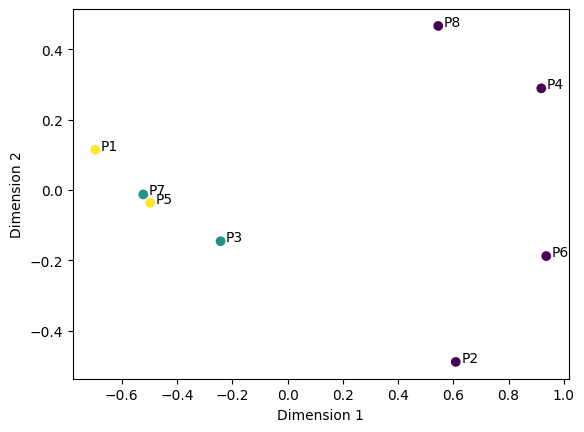

In [23]:
import mca

# hair_color = data['hair_color']
# eye_color = data['eye_color'] 
# skin_color = data['skin_color']

# # Concatenate the columns into a single DataFrame
# categories = pd.concat([hair_color, eye_color, skin_color], axis=1)
# categories = categories.reset_index(drop=True)
# categories = pd.get_dummies(categories)
categories = pd.get_dummies(data)

# Perform MCA
mca_df = mca.MCA(categories, ncols=3)
mca_results = mca_df.fs_r(N=len(categories))

# View the eigenvalues 
print(mca_df.L) 

# Plot the results 
import matplotlib.pyplot as plt 
plt.scatter(mca_results[:,0], mca_results[:,1], c=data['Cluster'].to_list())
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

for label, x, y in zip(data.index, mca_results[:,0], mca_results[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(x + .02, y))
plt.show()

In [24]:
mca.MCA(categories, ncols=3).fs_r(N=8)

array([[-0.69574285,  0.11449975,  0.22414335],
       [ 0.60862459, -0.48878674,  0.17396791],
       [-0.24251371, -0.14542723, -0.35611703],
       [ 0.91823433,  0.28947691, -0.04960102],
       [-0.49736269, -0.03615437,  0.21098904],
       [ 0.93611507, -0.18771208,  0.03965206],
       [-0.52226216, -0.01238649, -0.31486447],
       [ 0.5452364 ,  0.46686457,  0.0054024 ]])

In [25]:
df = pd.DataFrame({'component_1': mca_results[:,0], 'component_2': mca_results[:,1], 'predicted_cluster': clusters})
n_clusters = 3

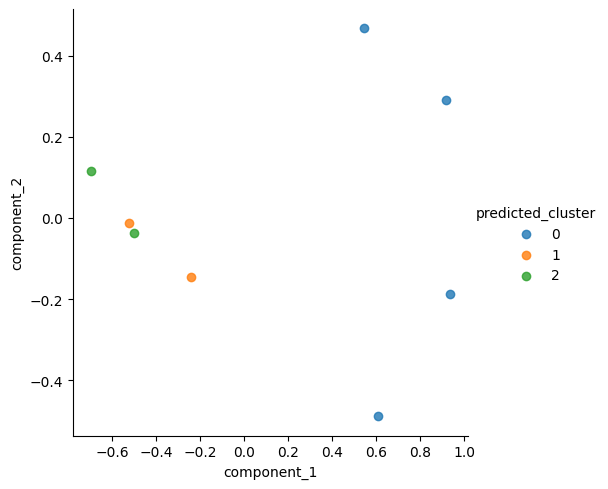

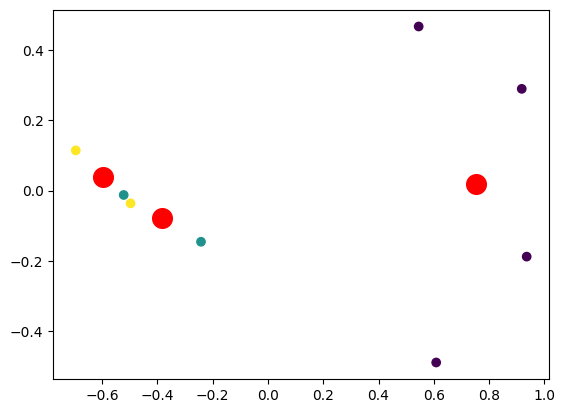

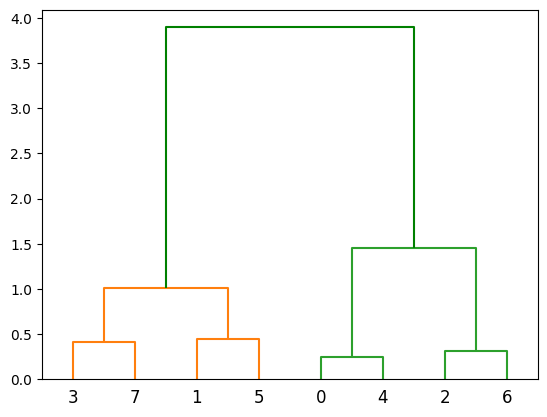

In [26]:
# Cluster scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='component_1', y='component_2', data=df, hue='predicted_cluster', fit_reg=False)
plt.show()

# Centroid plot 
centroid_x = [] 
centroid_y = []
for cluster in range(n_clusters): 
    xs = df[df['predicted_cluster'] == cluster]['component_1']
    ys = df[df['predicted_cluster'] == cluster]['component_2']
    centroid_x.append(xs.mean())
    centroid_y.append(ys.mean())

plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
plt.scatter(df['component_1'], df['component_2'], c=df['predicted_cluster'])
plt.show()  

# Cluster dendrogram 
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(df, method='ward', metric='euclidean')
dendrogram(Z, color_threshold=n_clusters, above_threshold_color='g')
plt.show()